In [1]:
# ‚ú® 1. ÏÑ§Ïπò
!pip install transformers datasets scikit-learn --quiet
!pip install --upgrade datasets huggingface_hub fsspec

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.5/491.5 kB 14.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 514.8/514.8 kB 43.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 193.6/193.6 kB 17.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.32.4
    Uninstalling huggingface-hub-0.32.4:
      Successfully uninstalled huggingface-hub-0.32.4
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ER

In [2]:
# ‚ú® 2. ÎùºÏù¥Î∏åÎü¨Î¶¨ Î°úÎî©
import torch
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

In [3]:
# ‚ú® 3. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
dataset = load_dataset("klue", "ynat")
dataset = dataset.remove_columns(["guid"])  # Î∂àÌïÑÏöîÌïú Ïó¥ Ï†úÍ±∞


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/22.5k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/4.17M [00:00<?, ?B/s]

validation-00000-of-00001.parquet:   0%|          | 0.00/847k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/45678 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/9107 [00:00<?, ? examples/s]

In [4]:
dataset

DatasetDict({
    train: Dataset({
        features: ['title', 'label', 'url', 'date'],
        num_rows: 45678
    })
    validation: Dataset({
        features: ['title', 'label', 'url', 'date'],
        num_rows: 9107
    })
})

In [5]:
print(dataset["train"].features)

{'title': Value(dtype='string', id=None), 'label': ClassLabel(names=['ITÍ≥ºÌïô', 'Í≤ΩÏ†ú', 'ÏÇ¨Ìöå', 'ÏÉùÌôúÎ¨∏Ìôî', 'ÏÑ∏Í≥Ñ', 'Ïä§Ìè¨Ï∏†', 'Ï†ïÏπò'], id=None), 'url': Value(dtype='string', id=None), 'date': Value(dtype='string', id=None)}


In [6]:
# train ÏÑ∏Ìä∏ÏóêÏÑú ÏïûÎ∂ÄÎ∂Ñ 5Í∞ú Ï∂úÎ†•
for example in dataset["train"].select(range(5)):
    print(f"Î¨∏Ïû•: {example['title']}")
    print(f"ÎùºÎ≤®: {example['label']} (‚Üí {dataset['train'].features['label'].names[example['label']]})")
    print("-" * 50)

Î¨∏Ïû•: Ïú†ÌäúÎ∏å ÎÇ¥Îã¨ 2ÏùºÍπåÏßÄ ÌÅ¨Î¶¨ÏóêÏù¥ÌÑ∞ ÏßÄÏõê Í≥µÍ∞Ñ Ïö¥ÏòÅ
ÎùºÎ≤®: 3 (‚Üí ÏÉùÌôúÎ¨∏Ìôî)
--------------------------------------------------
Î¨∏Ïû•: Ïñ¥Î≤ÑÏù¥ÎÇ† ÎßëÎã§Í∞Ä ÌùêÎ†§Ï†∏‚Ä¶ÎÇ®Î∂ÄÏßÄÎ∞© ÏòÖÏùÄ Ìô©ÏÇ¨
ÎùºÎ≤®: 3 (‚Üí ÏÉùÌôúÎ¨∏Ìôî)
--------------------------------------------------
Î¨∏Ïû•: ÎÇ¥ÎÖÑÎ∂ÄÌÑ∞ Íµ≠Í∞ÄRD ÌèâÍ∞Ä Îïå ÎÖºÎ¨∏Í±¥ÏàòÎäî Î∞òÏòÅ ÏïäÎäîÎã§
ÎùºÎ≤®: 2 (‚Üí ÏÇ¨Ìöå)
--------------------------------------------------
Î¨∏Ïû•: ÍπÄÎ™ÖÏûê Ïã†ÏûÑ Í≥ºÏ¥ù ÌöåÏû• ÏõêÎ°úÏôÄ Ï†äÏùÄ Í≥ºÌïôÏûê ÏßÄÌòú Î™®ÏùÑ Í≤É
ÎùºÎ≤®: 2 (‚Üí ÏÇ¨Ìöå)
--------------------------------------------------
Î¨∏Ïû•: ÌöåÏÉâÏù∏Í∞Ñ ÏûëÍ∞Ä ÍπÄÎèôÏãù ÏñëÏã¨Í≥†Î∞± Îì± ÏÉà ÏÜåÏÑ§Ïßë 2Í∂å Ï∂úÍ∞Ñ
ÎùºÎ≤®: 3 (‚Üí ÏÉùÌôúÎ¨∏Ìôî)
--------------------------------------------------


In [7]:
# ‚ú® 4. ÎùºÎ≤® Ïù¥Î¶Ñ Îß§Ìïë ÌôïÏù∏
label_list = dataset["train"].features["label"].names
print("ÎùºÎ≤® Î™©Î°ù:", label_list)

ÎùºÎ≤® Î™©Î°ù: ['ITÍ≥ºÌïô', 'Í≤ΩÏ†ú', 'ÏÇ¨Ìöå', 'ÏÉùÌôúÎ¨∏Ìôî', 'ÏÑ∏Í≥Ñ', 'Ïä§Ìè¨Ï∏†', 'Ï†ïÏπò']


In [8]:
# ‚ú® 5. ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Ï§ÄÎπÑ
model_name = "beomi/kcbert-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/619 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/250k [00:00<?, ?B/s]

In [9]:
# ‚ú® 6. ÌÜ†ÌÅ∞Ìôî Ìï®Ïàò Ï†ïÏùò
def preprocess(examples):
    return tokenizer(examples["title"], truncation=True, padding="max_length", max_length=128)

encoded_dataset = dataset.map(preprocess, batched=True)

Map:   0%|          | 0/45678 [00:00<?, ? examples/s]

Map:   0%|          | 0/9107 [00:00<?, ? examples/s]

In [10]:
# ‚ú® 7. Îç∞Ïù¥ÌÑ∞ÏÖã ÌòïÏãù Ï†ïÎ¶¨
encoded_dataset = encoded_dataset.rename_column("label", "labels")
encoded_dataset.set_format("torch", columns=["input_ids", "attention_mask", "labels"])

In [11]:
# ‚ú® 8. Î™®Îç∏ Ï§ÄÎπÑ
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=len(label_list))

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at beomi/kcbert-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [12]:
# ‚ú® 9. Ï†ïÌôïÎèÑ Í≥ÑÏÇ∞ Ìï®Ïàò
def compute_metrics(pred):
    logits, labels = pred
    predictions = np.argmax(logits, axis=-1)
    acc = accuracy_score(labels, predictions)
    return {"accuracy": acc}

In [13]:
# ‚ú® 10. ÌõàÎ†® ÏÑ§Ï†ï
training_args = TrainingArguments(
    output_dir="./results",
    report_to="none",  # ‚Üê Ïù¥ Ï§Ñ Ï∂îÍ∞Ä: W&B ÏÇ¨Ïö© Ïïà Ìï®
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=5e-5,
    per_device_train_batch_size=32 if torch.cuda.is_available() else 4,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    logging_dir="./logs",
)

In [14]:
# ‚ú® 11. Trainer Ï†ïÏùò
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    compute_metrics=compute_metrics,
)

In [15]:
# ‚ú® 12. Î™®Îç∏ ÌïôÏäµ ÏãúÏûë
trainer.train()

TrainOutput(global_step=4284, training_loss=0.3260887860138766, metrics={'train_runtime': 3028.5989, 'train_samples_per_second': 45.247, 'train_steps_per_second': 1.415, 'total_flos': 9014194745971200.0, 'train_loss': 0.3260887860138766, 'epoch': 3.0})

In [16]:
# ‚ú® 13. ÌèâÍ∞Ä
trainer.evaluate()

{'eval_loss': 0.47404801845550537,
 'eval_accuracy': 0.8314483364444932,
 'eval_runtime': 62.7212,
 'eval_samples_per_second': 145.198,
 'eval_steps_per_second': 4.544,
 'epoch': 3.0}

In [17]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
import numpy as np

# üîç 1. Validation Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌïú ÏòàÏ∏°
pred_output = trainer.predict(encoded_dataset["validation"])
y_pred = np.argmax(pred_output.predictions, axis=1)
y_true = pred_output.label_ids

<ipython-input-18-3864721496>:8: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-3864721496>:8: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-3864721496>:8: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-3864721496>:8: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-3864721496>:8: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-3864721496>:8: UserWarning: Glyph 54924 (\N{HANGUL SYLLABLE HOE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-3864721496>:8: UserWarning: Glyph 49373 (\N{HANGUL SYLLABLE SAENG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-18-386472

<Figure size 800x600 with 0 Axes>

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44284 (\N{HANGUL SYLLABLE GWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

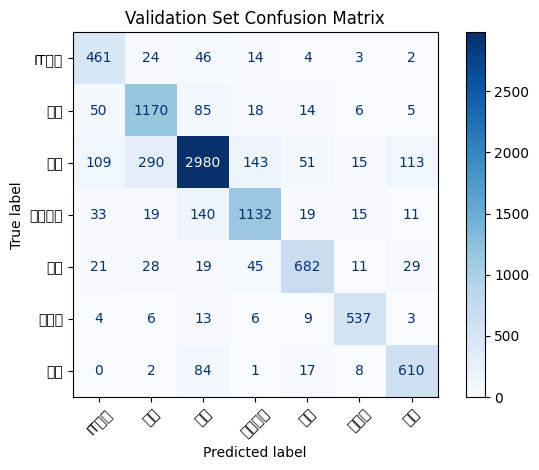

In [18]:
# üîç 2. confusion matrix Í≥ÑÏÇ∞ Î∞è ÏãúÍ∞ÅÌôî
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_list)

plt.figure(figsize=(8, 6))
disp.plot(xticks_rotation=45, cmap="Blues", values_format='d')
plt.title("Validation Set Confusion Matrix")
plt.tight_layout()
plt.show()

In [19]:
# üîç 3. ÌÅ¥ÎûòÏä§Î≥Ñ precision / recall / f1 Ï∂úÎ†•
print("\nüìä Classification Report:")
print(classification_report(y_true, y_pred, target_names=label_list, digits=3))


üìä Classification Report:
              precision    recall  f1-score   support

        ITÍ≥ºÌïô      0.680     0.832     0.748       554
          Í≤ΩÏ†ú      0.760     0.868     0.811      1348
          ÏÇ¨Ìöå      0.885     0.805     0.843      3701
        ÏÉùÌôúÎ¨∏Ìôî      0.833     0.827     0.830      1369
          ÏÑ∏Í≥Ñ      0.857     0.817     0.836       835
         Ïä§Ìè¨Ï∏†      0.903     0.929     0.916       578
          Ï†ïÏπò      0.789     0.845     0.816       722

    accuracy                          0.831      9107
   macro avg      0.815     0.846     0.829      9107
weighted avg      0.837     0.831     0.832      9107



#gradioÎ•º ÌÜµÌï¥ ÏõπÏóêÏÑú ÌÖåÏä§Ìä∏

In [20]:
print(trainer.state.best_model_checkpoint)

./results/checkpoint-2856


In [40]:
# ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Ï†ÄÏû•Îêú Î™®Îç∏ Í≤ΩÎ°ú ÌôïÏù∏ (TrainerÏóêÏÑú Ï†ÄÏû•Îêú Í≤ΩÎ°ú)
model_path = "./results/checkpoint-2856"

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î∞è Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
tokenizer = AutoTokenizer.from_pretrained("beomi/kcbert-base")  # ÎòêÎäî ÌïôÏäµÏóê Ïì¥ Î™®Îç∏
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# ÎùºÎ≤® Î¶¨Ïä§Ìä∏
label_list = dataset["train"].features["label"].names


In [41]:
# Îâ¥Ïä§ Ï†úÎ™© Ï∂îÏ∂ú Ìï®Ïàò
import requests
from bs4 import BeautifulSoup

def extract_news_title(url):
    import requests
    from bs4 import BeautifulSoup

    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        res = requests.get(url, headers=headers, timeout=5)
        soup = BeautifulSoup(res.text, "html.parser")

        # 1. og:title
        og = soup.find("meta", property="og:title")
        if og and og.get("content"):
            return og["content"]

        # 2. ÏÇ¨Ïù¥Ìä∏Î≥Ñ Ïª§Ïä§ÌÖÄ ÏÖÄÎ†âÌÑ∞
        selectors = [
            "#title_area > span",  # ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§
            "h1.title",            # Î¨∏ÌôîÏùºÎ≥¥
            "#news-title",         # SBS
            ".tit.title_area",     # Îâ¥ÏãúÏä§
            ".article_headline",   # Íµ≠ÎØºÏùºÎ≥¥
            ".article-header__headline-container span",  # Ï°∞ÏÑ†ÎπÑÏ¶à
            "h1.subject",          # Î®∏ÎãàÌà¨Îç∞Ïù¥
            ".headline-title"      # KBS
        ]

        for selector in selectors:
            el = soup.select_one(selector)
            if el and el.text.strip():
                return el.text.strip()

        # 3. fallback: ÏùºÎ∞ò title ÌÉúÍ∑∏
        if soup.title:
            return soup.title.string.strip()

        return "Ï†úÎ™©ÏùÑ Ï∂îÏ∂úÌï† Ïàò ÏóÜÏäµÎãàÎã§."
    except Exception as e:
        return f"[Ïò§Î•ò] Ï†úÎ™© Ï∂îÏ∂ú Ïã§Ìå®: {e}"



In [42]:
# ÏòàÏ∏° Ìï®Ïàò
import torch

def predict_news_category_from_url(url):
    title = extract_news_title(url)
    if title.startswith("[Ïò§Î•ò]") or title == "Ï†úÎ™©ÏùÑ Ï∂îÏ∂úÌï† Ïàò ÏóÜÏäµÎãàÎã§.":
        return "Ïò§Î•ò", "Ïò§Î•ò"

    inputs = tokenizer(title, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()

    category = label_list[pred]
    return category, title  # Î¨∏ÏûêÏó¥ Îëê Í∞úÎ•º ÌäúÌîåÎ°ú Î∞òÌôò

In [43]:
import gradio as gr

with gr.Blocks(css="""
body {
    background-color: #1e1e1e;
    color: #ffffff;
    font-family: 'Segoe UI', sans-serif;
}
#main-container {
    max-width: 700px;
    margin: auto;
    padding-top: 40px;
}
.output-box {
    background-color: #ffffff;
    color: #000000;
    border-radius: 8px;
    padding: 12px;
    font-size: 16px;
    font-weight: bold;
    border: 1px solid #cccccc;
}
""") as demo:
    with gr.Column(elem_id="main-container"):
        gr.Markdown("## üì∞ Îâ¥Ïä§ Ï£ºÏ†ú ÏûêÎèô Î∂ÑÎ•òÍ∏∞", elem_id="title")

        url_input = gr.Textbox(label="Îâ¥Ïä§ Í∏∞ÏÇ¨ URL", placeholder="https://...")
        submit_btn = gr.Button("ÏòàÏ∏°ÌïòÍ∏∞")

        gr.Markdown("#### üìå ÏòàÏ∏° Ïπ¥ÌÖåÍ≥†Î¶¨")
        category_output = gr.Textbox(label="", interactive=False, elem_classes=["block-box"])

        gr.Markdown("#### üìå Ï∂îÏ∂úÎêú Ï†úÎ™©")
        title_output = gr.Textbox(label="", interactive=False, elem_classes=["block-box"])

        submit_btn.click(fn=predict_news_category_from_url, inputs=url_input, outputs=[category_output, title_output])

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a0e278c37a3b847bb1.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [26]:
!zip -r checkpoint-2856.zip ./results/checkpoint-2856

  adding: results/checkpoint-2856/ (stored 0%)
  adding: results/checkpoint-2856/training_args.bin (deflated 52%)
  adding: results/checkpoint-2856/model.safetensors (deflated 7%)
  adding: results/checkpoint-2856/config.json (deflated 58%)
  adding: results/checkpoint-2856/trainer_state.json (deflated 65%)
  adding: results/checkpoint-2856/rng_state.pth (deflated 25%)
  adding: results/checkpoint-2856/scheduler.pt (deflated 55%)
  adding: results/checkpoint-2856/optimizer.pt (deflated 20%)


#final_modelÏùÑ ÌÜµÌï¥ Ïã§Ìñâ

In [27]:
# trainer.save_model("final_model")

In [36]:
# ÌïôÏäµÎêú Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞

from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Ï†ÄÏû•Îêú Î™®Îç∏ Í≤ΩÎ°ú ÌôïÏù∏ (TrainerÏóêÏÑú Ï†ÄÏû•Îêú Í≤ΩÎ°ú)
model_path = "./final_model"

# ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î∞è Î™®Îç∏ Î∂àÎü¨Ïò§Í∏∞
tokenizer = AutoTokenizer.from_pretrained("beomi/kcbert-base")  # ÌïôÏäµÏóê Ïì¥ Î™®Îç∏
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# ÎùºÎ≤® Î¶¨Ïä§Ìä∏
label_list = dataset["train"].features["label"].names


In [37]:
# Îâ¥Ïä§ Ï†úÎ™© Ï∂îÏ∂ú Ìï®Ïàò
import requests
from bs4 import BeautifulSoup

def extract_news_title(url):
    import requests
    from bs4 import BeautifulSoup

    headers = {"User-Agent": "Mozilla/5.0"}
    try:
        res = requests.get(url, headers=headers, timeout=5)
        soup = BeautifulSoup(res.text, "html.parser")

        # 1. og:title
        og = soup.find("meta", property="og:title")
        if og and og.get("content"):
            return og["content"]

        # 2. ÏÇ¨Ïù¥Ìä∏Î≥Ñ Ïª§Ïä§ÌÖÄ ÏÖÄÎ†âÌÑ∞
        selectors = [
            "#title_area > span",  # ÎÑ§Ïù¥Î≤Ñ Îâ¥Ïä§
            "h1.title",            # Î¨∏ÌôîÏùºÎ≥¥
            "#news-title",         # SBS
            ".tit.title_area",     # Îâ¥ÏãúÏä§
            ".article_headline",   # Íµ≠ÎØºÏùºÎ≥¥
            ".article-header__headline-container span",  # Ï°∞ÏÑ†ÎπÑÏ¶à
            "h1.subject",          # Î®∏ÎãàÌà¨Îç∞Ïù¥
            ".headline-title"      # KBS
        ]

        for selector in selectors:
            el = soup.select_one(selector)
            if el and el.text.strip():
                return el.text.strip()

        # 3. fallback: ÏùºÎ∞ò title ÌÉúÍ∑∏
        if soup.title:
            return soup.title.string.strip()

        return "Ï†úÎ™©ÏùÑ Ï∂îÏ∂úÌï† Ïàò ÏóÜÏäµÎãàÎã§."
    except Exception as e:
        return f"[Ïò§Î•ò] Ï†úÎ™© Ï∂îÏ∂ú Ïã§Ìå®: {e}"



In [38]:
# ÏòàÏ∏° Ìï®Ïàò
import torch

def predict_news_category_from_url(url):
    title = extract_news_title(url)
    if title.startswith("[Ïò§Î•ò]") or title == "Ï†úÎ™©ÏùÑ Ï∂îÏ∂úÌï† Ïàò ÏóÜÏäµÎãàÎã§.":
        return "Ïò§Î•ò", "Ïò§Î•ò"

    inputs = tokenizer(title, return_tensors="pt", truncation=True, padding=True, max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        pred = torch.argmax(outputs.logits, dim=1).item()

    category = label_list[pred]
    return category, title  # Î¨∏ÏûêÏó¥ Îëê Í∞úÎ•º ÌäúÌîåÎ°ú Î∞òÌôò

In [39]:
import gradio as gr

with gr.Blocks(css="""
body {
    background-color: #1e1e1e;
    color: #ffffff;
    font-family: 'Segoe UI', sans-serif;
}
#main-container {
    max-width: 700px;
    margin: auto;
    padding-top: 40px;
}
.output-box {
    background-color: #ffffff;
    color: #000000;
    border-radius: 8px;
    padding: 12px;
    font-size: 16px;
    font-weight: bold;
    border: 1px solid #cccccc;
}
""") as demo:
    with gr.Column(elem_id="main-container"):
        gr.Markdown("## üì∞ Îâ¥Ïä§ Ï£ºÏ†ú ÏûêÎèô Î∂ÑÎ•òÍ∏∞", elem_id="title")

        url_input = gr.Textbox(label="Îâ¥Ïä§ Í∏∞ÏÇ¨ URL", placeholder="https://...")
        submit_btn = gr.Button("ÏòàÏ∏°ÌïòÍ∏∞")

        gr.Markdown("#### üìå ÏòàÏ∏° Ïπ¥ÌÖåÍ≥†Î¶¨")
        category_output = gr.Textbox(label="", interactive=False, elem_classes=["block-box"])

        gr.Markdown("#### üìå Ï∂îÏ∂úÎêú Ï†úÎ™©")
        title_output = gr.Textbox(label="", interactive=False, elem_classes=["block-box"])

        submit_btn.click(fn=predict_news_category_from_url, inputs=url_input, outputs=[category_output, title_output])

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://af230ae733caebff20.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
